## Summary notes

Return the estimate of the trend component of a non-seasonal time series by taking the simple moving average.

Data was sourced from Rdatasets[^1] using StatsModels `Datasets` package.[^2]

Three trend estimates were obtained, using the workflow:
`rolling`[^3] → `mean` → `dropna`

The choice of order must be an odd number.
Too low an order risks *under-smoothing*, meaning much of the irrelavent noise is kept.
Coversely, too high an order risks *over-smoothing*, meaning any subtle (but important) changes in the trend are ironed out 

This topic was covered in M249, Book 2, Part 1.4.

## Dependencies

In [1]:
import pandas as pd
from statsmodels import datasets
from matplotlib import pyplot as plt
import seaborn as sns

Set the graphing defaults.
(This is optional.)

In [2]:
sns.set_theme()

## Main

### Load the data

In [3]:
bomregions = datasets.get_rdataset('bomregions', package='DAAG', cache=True)
bomregions.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       109 non-null    int64  
 1   eastAVt    99 non-null     float64
 2   seAVt      99 non-null     float64
 3   southAVt   99 non-null     float64
 4   swAVt      99 non-null     float64
 5   westAVt    99 non-null     float64
 6   northAVt   99 non-null     float64
 7   mdbAVt     99 non-null     float64
 8   auAVt      99 non-null     float64
 9   eastRain   109 non-null    float64
 10  seRain     109 non-null    float64
 11  southRain  109 non-null    float64
 12  swRain     109 non-null    float64
 13  westRain   109 non-null    float64
 14  northRain  109 non-null    float64
 15  mdbRain    109 non-null    float64
 16  auRain     109 non-null    float64
 17  SOI        109 non-null    float64
 18  co2mlo     50 non-null     float64
 19  co2law     79 non-null     float64
 20  CO2       

### Initialise and plot the time series

Identify the initial year.

In [4]:
bomregions.data['Year'].head(1)

0    1900
Name: Year, dtype: int64

Initialise the `Series`.

In [6]:
ts_south_rain = pd.Series(
    data=bomregions.data['southRain'].to_numpy(),
    name='SOUTHERN RAINFALL',
    index=pd.date_range(
        start='1900',
        periods=bomregions.data['southRain'].size,
        freq='A-DEC',
        name='YEAR'
    )
)
ts_south_rain.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 109 entries, 1900-12-31 to 2008-12-31
Freq: A-DEC
Series name: SOUTHERN RAINFALL
Non-Null Count  Dtype  
--------------  -----  
109 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


Plot the time series.

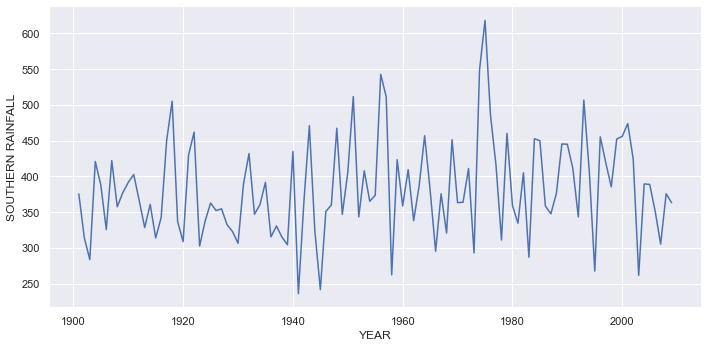

In [7]:
sns.relplot(
    x=ts_south_rain.index,
    y=ts_south_rain,
    kind='line',
    aspect=2
)
plt.show()

### Decompose the time series

Try *order* = 5.

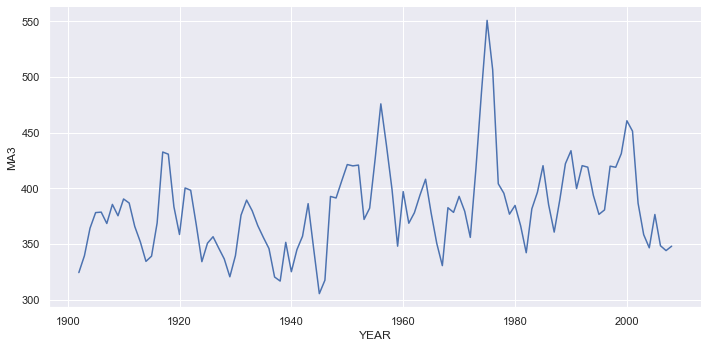

In [9]:
ma5 = ts_south_rain.rolling(window=5, center=True).mean().dropna()
g = sns.relplot(
    x=ma5.index,
    y=ma5,
    kind='line',
    aspect=2,
)
g.set_ylabels('ma5')
plt.show()

Try *order* = 15.

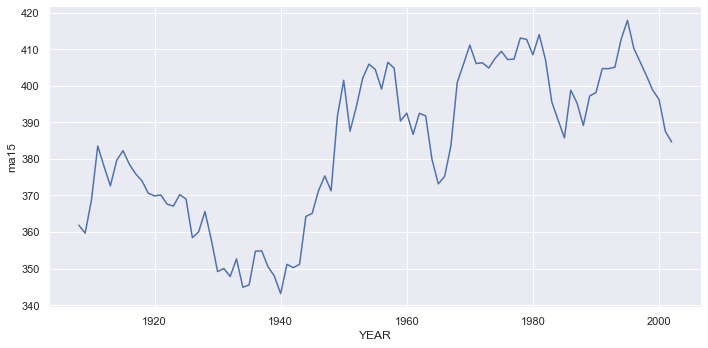

In [17]:
ma15 = ts_south_rain.rolling(window=15, center=True).mean().dropna()
g = sns.relplot(
    x=ma15.index,
    y=ma15,
    kind='line',
    aspect=2,
)
g.set_ylabels('ma15')
plt.show()

Try *order* = 25.

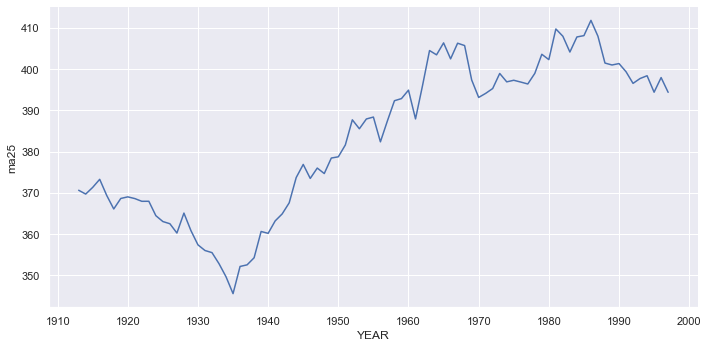

In [18]:
ma25 = ts_south_rain.rolling(window=25, center=True).mean().dropna()
g = sns.relplot(
    x=ma25.index,
    y=ma25,
    kind='line',
    aspect=2,
)
g.set_ylabels('ma25')
plt.show()

## Footnotes

[^1]: Arel-Bundock V (2022). Rdatasets: A collection of datasets originally distributed in various R packages. R package version 1.0.0, https://vincentarelbundock.github.io/Rdatasets
[^2]: See [The Datasets Package](https://www.statsmodels.org/devel/datasets/index.html) (StatsModels)
[^3]: See [pandas.Series.rolling](https://pandas.pydata.org/docs/reference/api/pandas.Series.rolling.html)
